**Interpretação estatística:**

O script a seguir tem a finalidade de criar funções que geram os seguintes resumos estatísticos:


*   Quartil 25 %, 50%, 75%;
*   Limites superiores e inferiores pelo método IQR;
*   Z-scores de cada linha do rol de dados;
*   Coeficiente de assimetria de Pearson;
*   Média, desvio padrão e contagem de dados;
*   Contagem de valores acima e abaixo dos limites para outliers;
*   Porcentagem de valores acima e abaixo dos outliers.


Criar gráficos com intuito de guiar o usuário na escolha de qual metodo estatístico  utilizar em sua limpeza de dados.


*   QQ plot;
*   Box plot;
*   Histograma;
*   Distribuição dos Z-scores;
*   Box plot mensal para cada variável.

In [55]:
from datetime import date, datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import openpyxl

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df=pd.read_excel("/content/drive/Shareddrives/PUB_Meteorologia/Planilhas_limpas/INMET_horarios_automatica/dados_A009_H_2004-12-16_2023-06-12.xlsx", engine='openpyxl', sheet_name="Plan1")

In [153]:
df.head(10)

,DATA,Hora Medicao,PREC (mm),P ATM (mB),QG (Kj/m²),T AR (°C),UR (%),U2 (m/s),Unnamed: 8,Nome: PALMAS,ANO,MES
0,2004-12-17,1500,4.0,977.6,478.582,26.6,67,0.3,NaN,Codigo Estacao: A009,2004,Dez
1,2004-12-17,1600,0.0,976.8,1070.125,27.8,67,2.0,NaN,Latitude: -10.14777777,2004,Dez
2,2004-12-17,1700,0.0,976.1,1981.808,28.7,64,2.7,NaN,Longitude: -48.31444444,2004,Dez
3,2004-12-17,1800,0.0,975.6,891.884,25.0,67,3.4,NaN,Altitude: 267,2004,Dez
4,2004-12-17,2000,0.0,975.5,225.708,25.6,67,1.5,NaN,Situacao: Operante,2004,Dez
5,2004-12-18,0,0.0,977.5,98.174,22.9,79,1.2,NaN,Data Inicial: 2004-12-16,2004,Dez
6,2004-12-18,1000,0.0,978.5,95.864,23.4,88,0.8,NaN,Data Final: 2023-06-12,2004,Dez
7,2004-12-18,1100,0.0,979.4,377.666,24.5,84,0.9,NaN,Periodicidade da Medicao: Horaria,2004,Dez
8,2004-12-18,1200,0.2,979.9,1260.284,26.0,77,1.2,NaN,NaN,2004,Dez
9,2004-12-18,1300,0.0,980.1,1004.531,26.4,76,1.2,NaN,NaN,2004,Dez


In [59]:
df=df.rename(columns={ 'Data Medicao':'DATA'})

In [60]:
df['ANO'] = df['DATA'].dt.year
df['MES'] = df['DATA'].dt.month

Analisando o dataframe visualmente, podemos observar os dados por completo via gráfico.

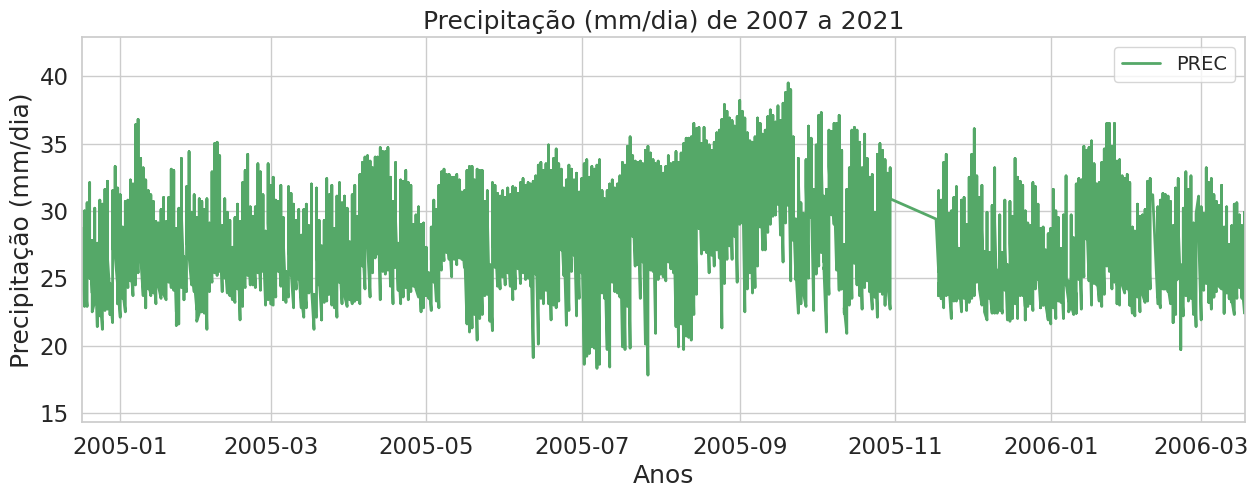

In [61]:
plt.figure(figsize=(15,5))
plt.plot(df["DATA"], df['T AR (°C)'], label='PREC', color='g', ls='-', lw='2');
plt.legend(loc=1, fontsize=14)
plt.ylabel('Precipitação (mm/dia)')
plt.xlabel('Anos')
plt.title('Precipitação (mm/dia) de 2007 a 2021')
plt.axis(xmin=df.DATA[0], xmax=df.DATA[5489])
plt.show()

In [62]:
df[["PREC (mm)",	"P ATM (mB)",	"QG (Kj/m²)",	"T AR (°C)"	,"UR (%)",	"U2 (m/s)"]].describe().T

,count,mean,std,min,25%,50%,75%,max
PREC (mm),80524.0,0.256612,1.980344,0.0,0.0000,0.0000,0.00000,71.200
P ATM (mB),80524.0,978.892613,2.445870,969.6,977.1000,979.0000,980.60000,987.600
QG (Kj/m²),80524.0,1358.672602,1058.519668,0.0,290.8135,1251.4675,2319.64975,4065.011
T AR (°C),80524.0,29.569543,3.961764,15.6,26.5000,29.7000,32.60000,41.600
UR (%),80524.0,55.221661,21.504191,10.0,36.0000,57.0000,73.00000,100.000
U2 (m/s),80524.0,2.119042,1.589991,0.0,1.0000,1.8000,2.80000,12.200


In [63]:
df.loc[df.MES == 1,'MES']='Jan'
df.loc[df.MES == 2,'MES']='Fev'
df.loc[df.MES == 3,'MES']='Mar'
df.loc[df.MES == 4,'MES']='Abr'
df.loc[df.MES == 5,'MES']='Mai'
df.loc[df.MES == 6,'MES']='Jun'
df.loc[df.MES == 7,'MES']='Jul'
df.loc[df.MES == 8,'MES']='Ago'
df.loc[df.MES == 9,'MES']='Set'
df.loc[df.MES == 10,'MES']='Out'
df.loc[df.MES == 11,'MES']='Nov'
df.loc[df.MES == 12,'MES']='Dez'


Box plot para cade mês é o ideal para avaliar a distribuição mensal dos eventos.

<ipython-input-64-e02611b53f24>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  t = sns.catplot(x='MES', y='value', data=grafico_variaveis, hue='Legenda', palette='pastel', kind='box',


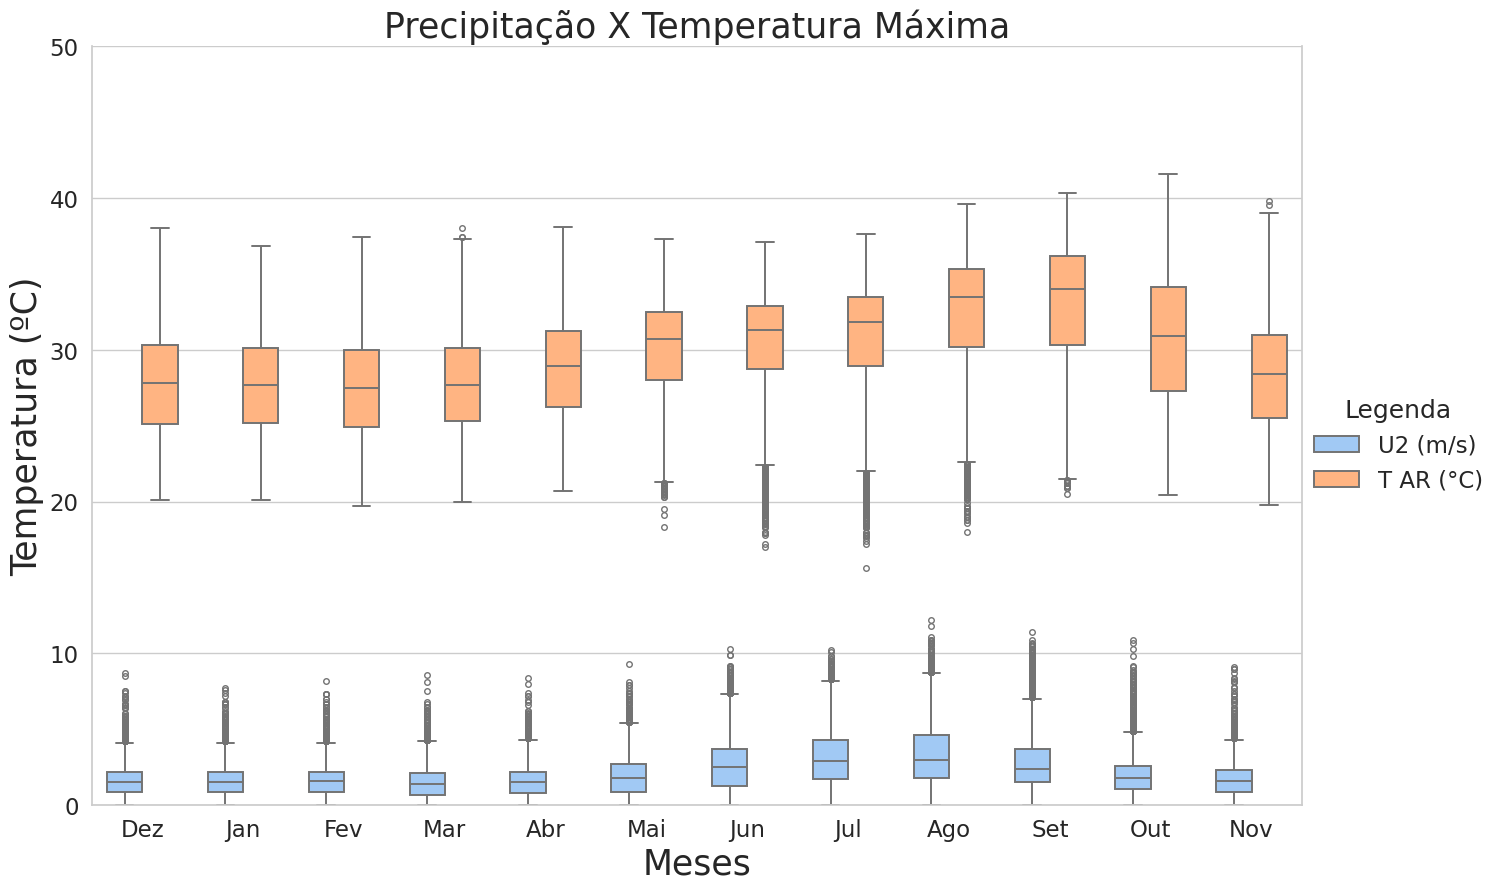

In [64]:
dados = df[["MES",'Hora Medicao','PREC (mm)','P ATM (mB)','QG (Kj/m²)','T AR (°C)','UR (%)','U2 (m/s)']]
grafico_variaveis = pd.melt(dados, id_vars=['MES'], value_vars=['U2 (m/s)','T AR (°C)'], var_name='Legenda')
# style: whitegrid, darkgrid, white, dark, ticks
sns.set(style='whitegrid', font_scale=1.5, rc={'font.size':25})
t = sns.catplot(x='MES', y='value', data=grafico_variaveis, hue='Legenda', palette='pastel', kind='box',
height=9, # Altura
width=0.7, # Largura das caixas de boxplot
aspect=1.5, # Tamanho do gráfico
legend=True, # Adicionar legenda
legend_out=True, # Legenda dentro ou fora da caixa
saturation=10, # Intensidade das cores
linewidth=1.4, # Espessura da linha
ci=95, # Intervalo de confiança
fliersize=4 # Espessura dos outliers
);
plt.grid(True);
plt.grid(axis='x'); # Linhas horizontais e verticais
plt.title('Precipitação X Temperatura Máxima', fontsize=25); # Título do gráfico
t.set_axis_labels('Meses', 'Temperatura (ºC)', fontsize=25); # Títulos dos eixos x e y
t.set(ylim=(0, 50)); # Limites do eixo y
t.despine(right=False); # Linha à direita
# t.savefig('grafico.png', dpi=50) # Salvar o gráfico em .png

A função skew mede o grau de assimetria da distribuição para cada variável separadamente:

*   skew = 0, distribuição simétrica;
*   skew > 0, assimétrica positiva (à direita);
*   skew < 0, assimétrica negativa (à esquerda).

In [66]:
print('Precipitação:', df['PREC (mm)'].skew())
print('Pressão atmosférica:', df['P ATM (mB)'].skew())
print('Radiação solar:', df['QG (Kj/m²)'].skew())
print('Umidade relativa:', df['UR (%)'].skew())
print('Temperatura média do ar:', df['T AR (°C)'].skew())
print('Velocidade do vento a 2 metros:', df['U2 (m/s)'].skew())

Precipitação: 13.898254075819398
Pressão atmosférica: -0.04811512134238721
Radiação solar: 0.25611328670274514
Umidade relativa: -0.06772365471706471
Temperatura média do ar: -0.040351630856851714
Velocidade do vento a 2 metros: 1.4086130261142675


Após observação do calculo de skew, verificamos a presença de de valores muito próximos de zero indicando que a distribuição nesse caso é normal ou gaussiana.
Para distribuições normais usamos o z-score e para dados não normais usamos o IQR ou percentil para avaliar os limites para outliers.

**Avaliação gráfica**

O histograma é a forma mais comum para observação de normalidade na distribuição, o gráfico deve assemelher-se a forma de sino.
O gráfico QQ Plot é interpretado com duas linhas uma azul e uma vermelha que devem ser alinhadas e sobrepostas para garantir que há normalidade.
O box plot é interpretado avaliando a simetria dos quartis, a parte superior após a mediana deve espelhar a parte inferior do gráfico, mostrando qua a distribuição possuicerto padrão.

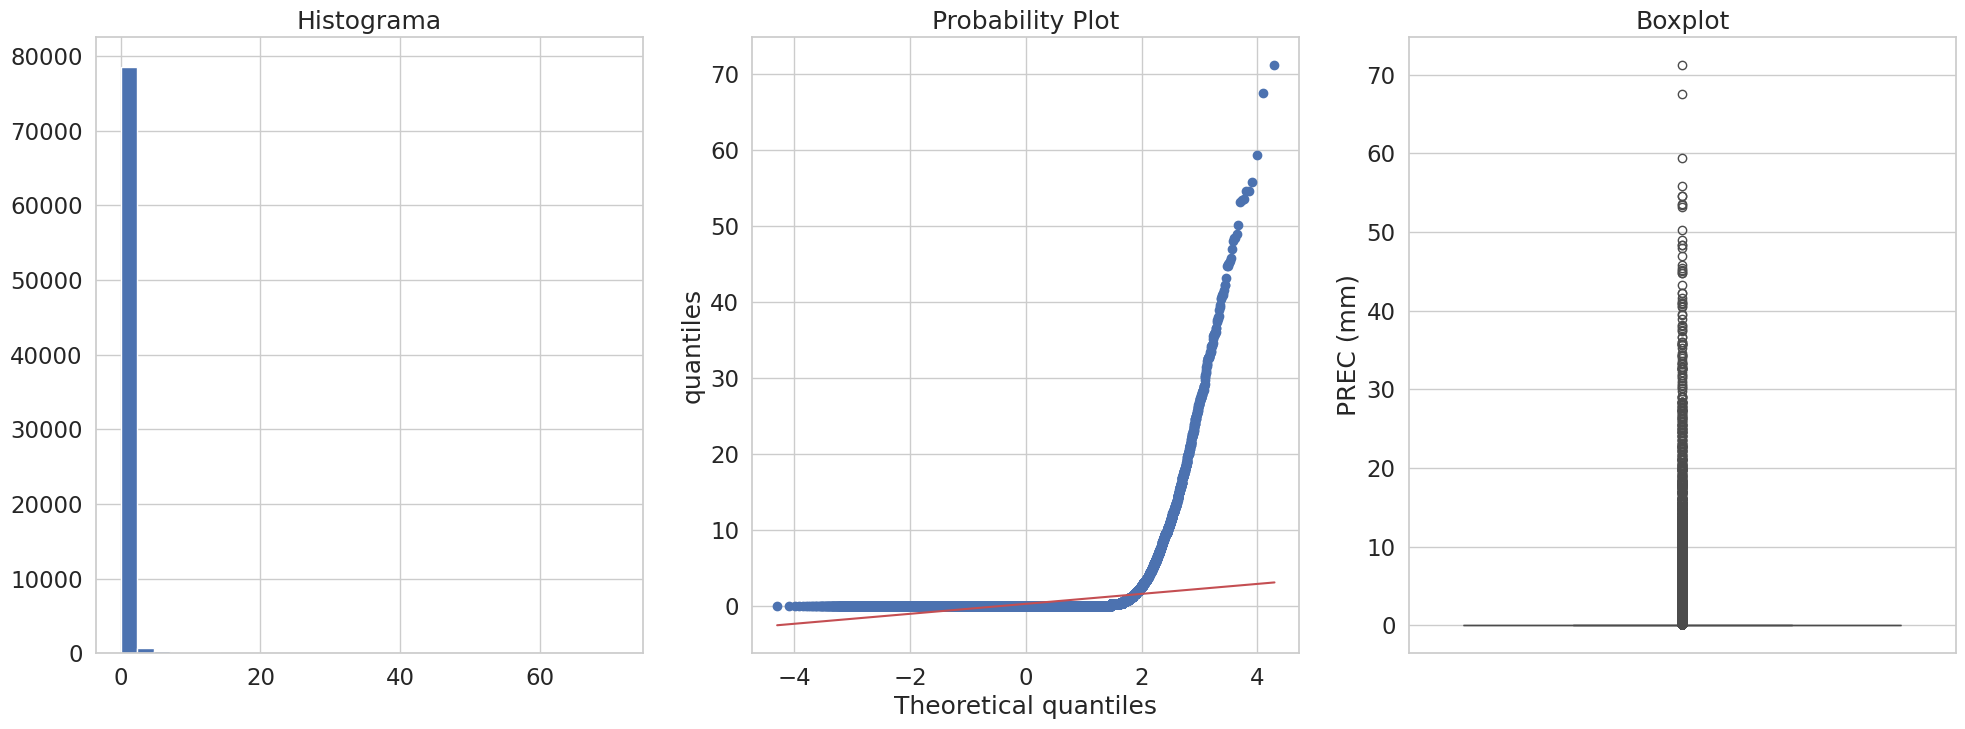

In [69]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['PREC (mm)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['PREC (mm)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['PREC (mm)'])
plt.title('Boxplot')
plt.show()

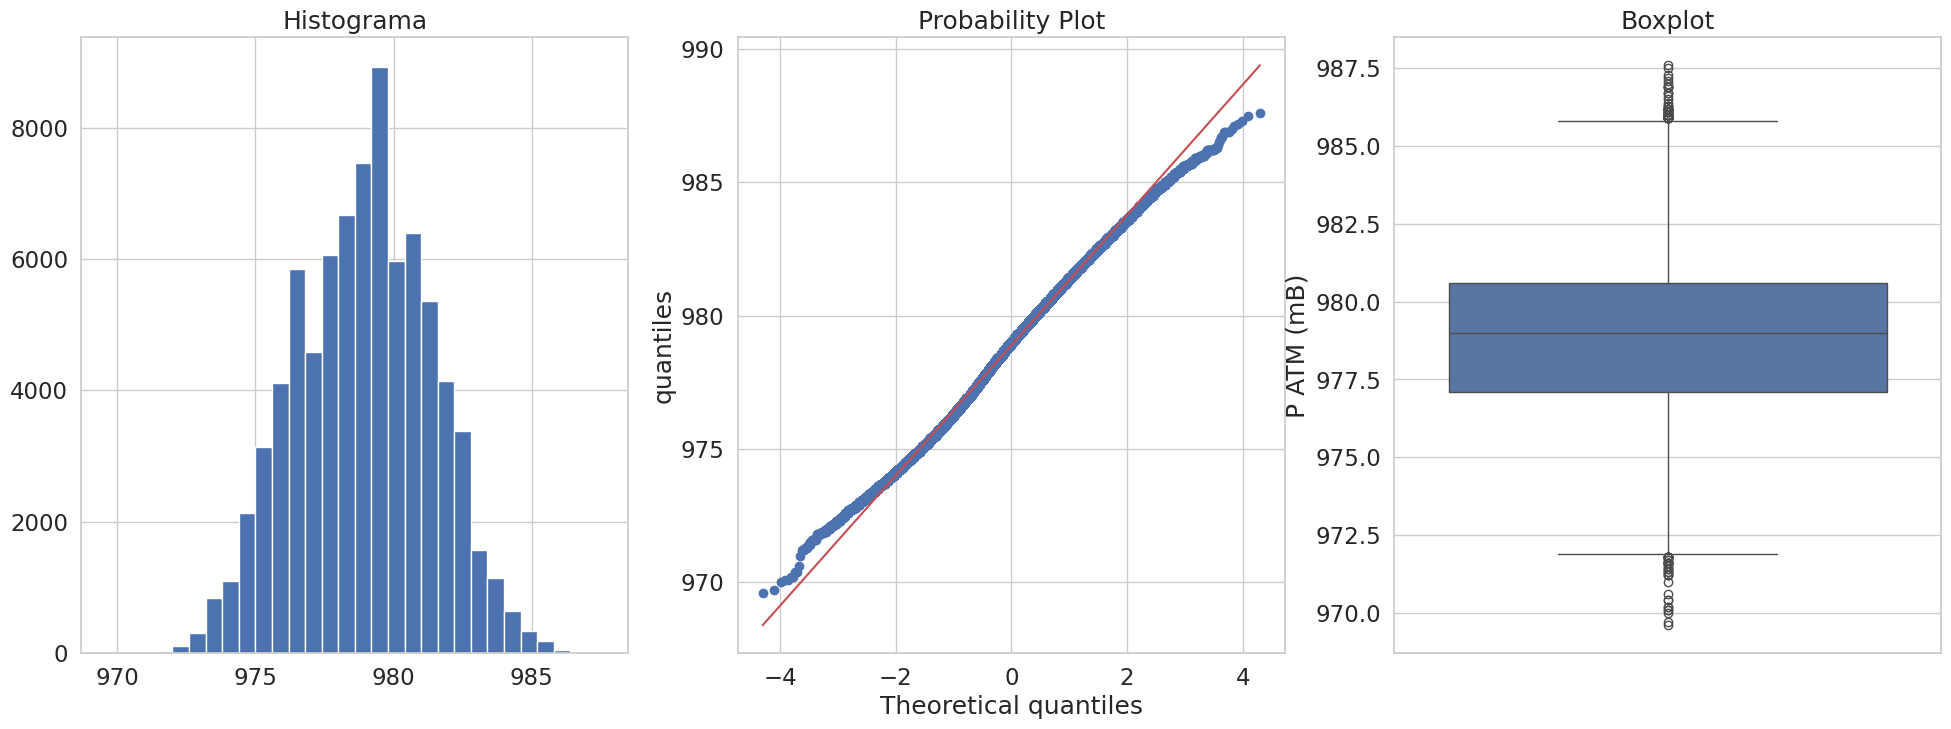

In [70]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['P ATM (mB)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['P ATM (mB)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['P ATM (mB)'])
plt.title('Boxplot')
plt.show()


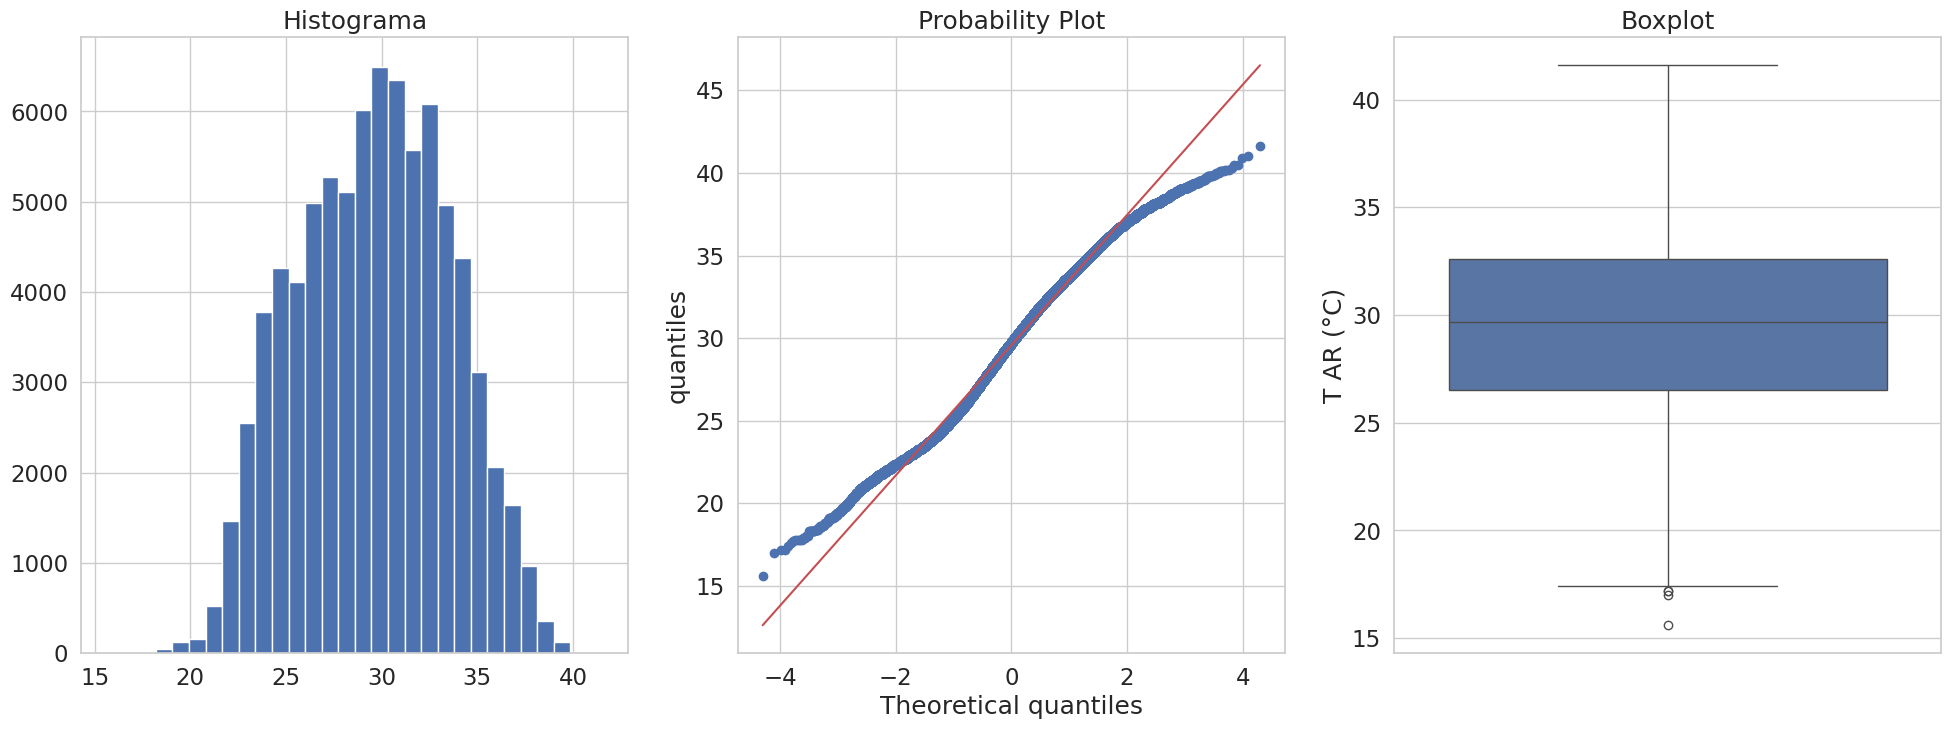

In [71]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['T AR (°C)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['T AR (°C)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['T AR (°C)'])
plt.title('Boxplot')
plt.show()

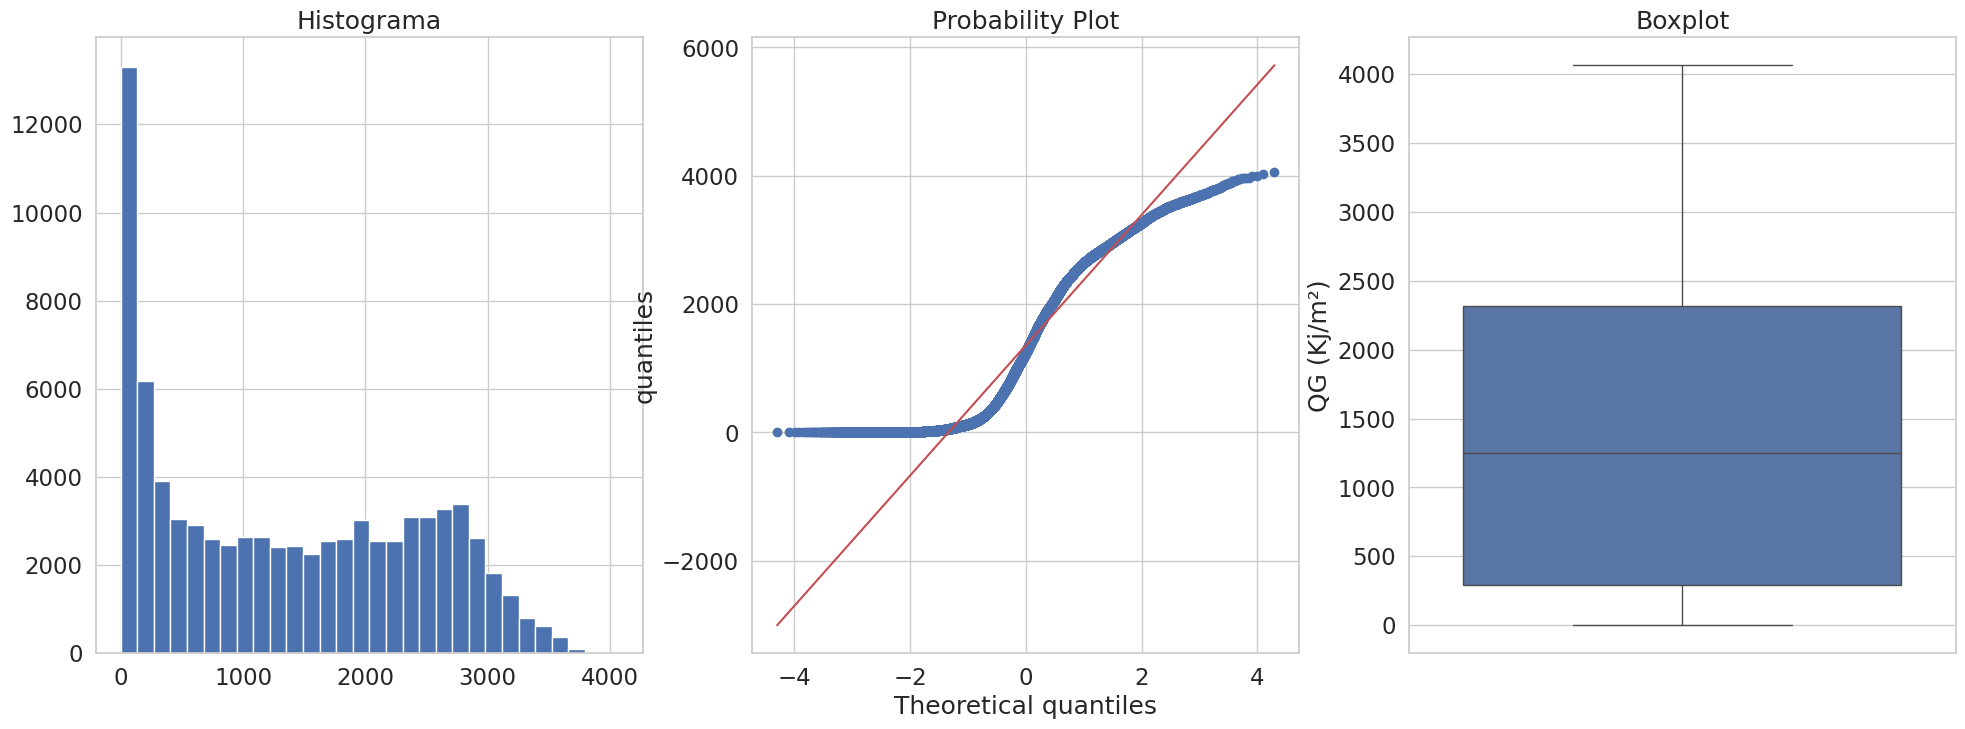

In [72]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['QG (Kj/m²)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['QG (Kj/m²)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['QG (Kj/m²)'])
plt.title('Boxplot')
plt.show()

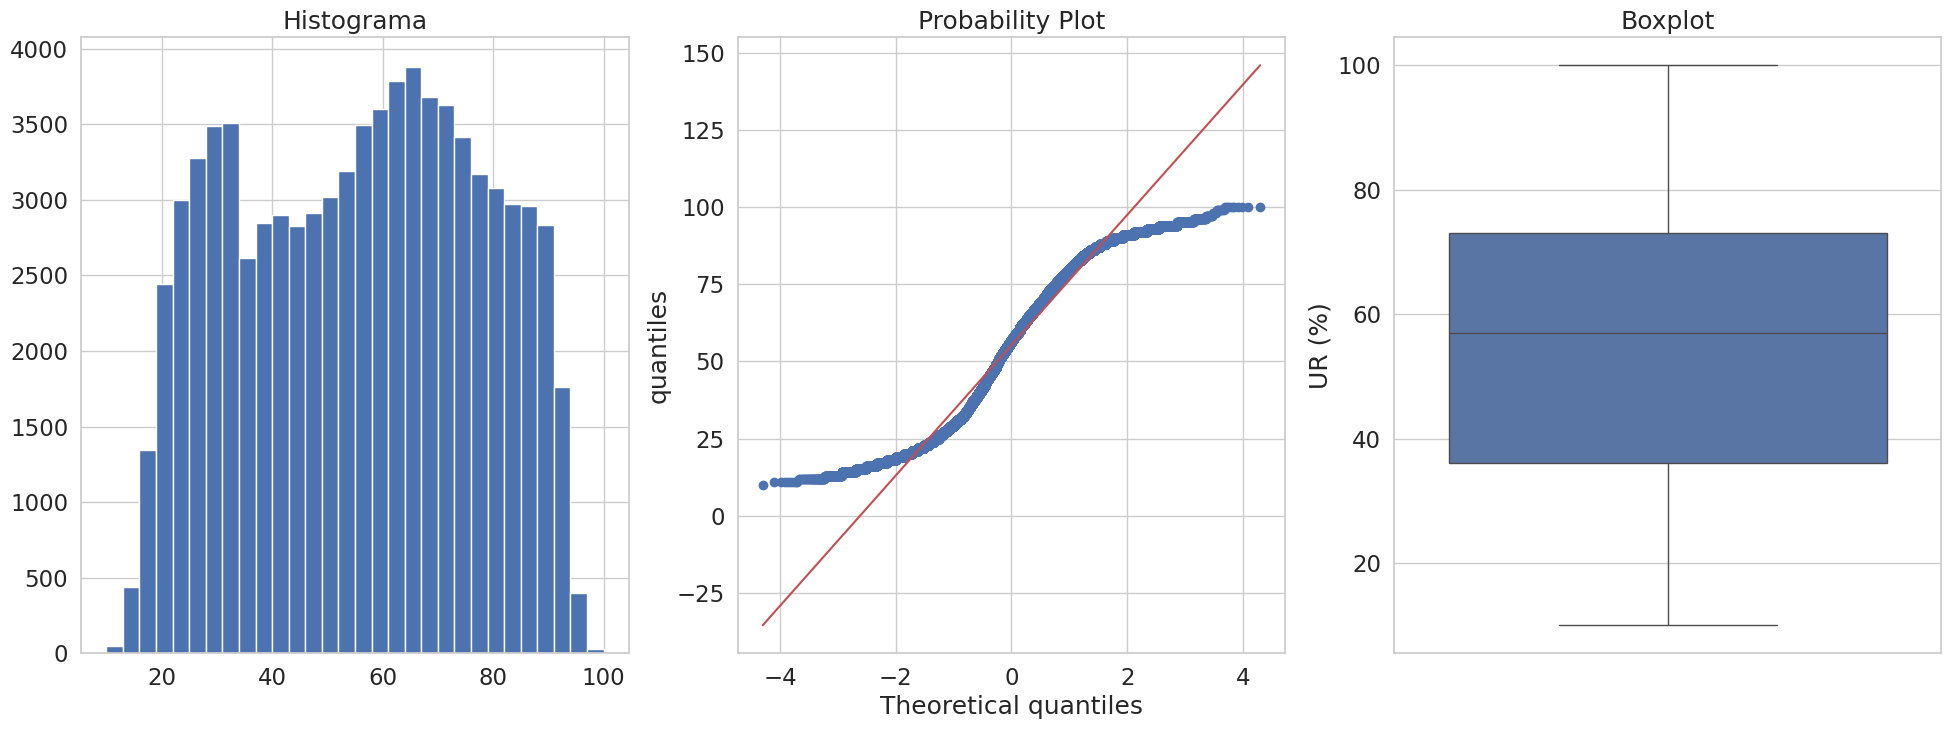

In [73]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['UR (%)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['UR (%)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['UR (%)'])
plt.title('Boxplot')
plt.show()

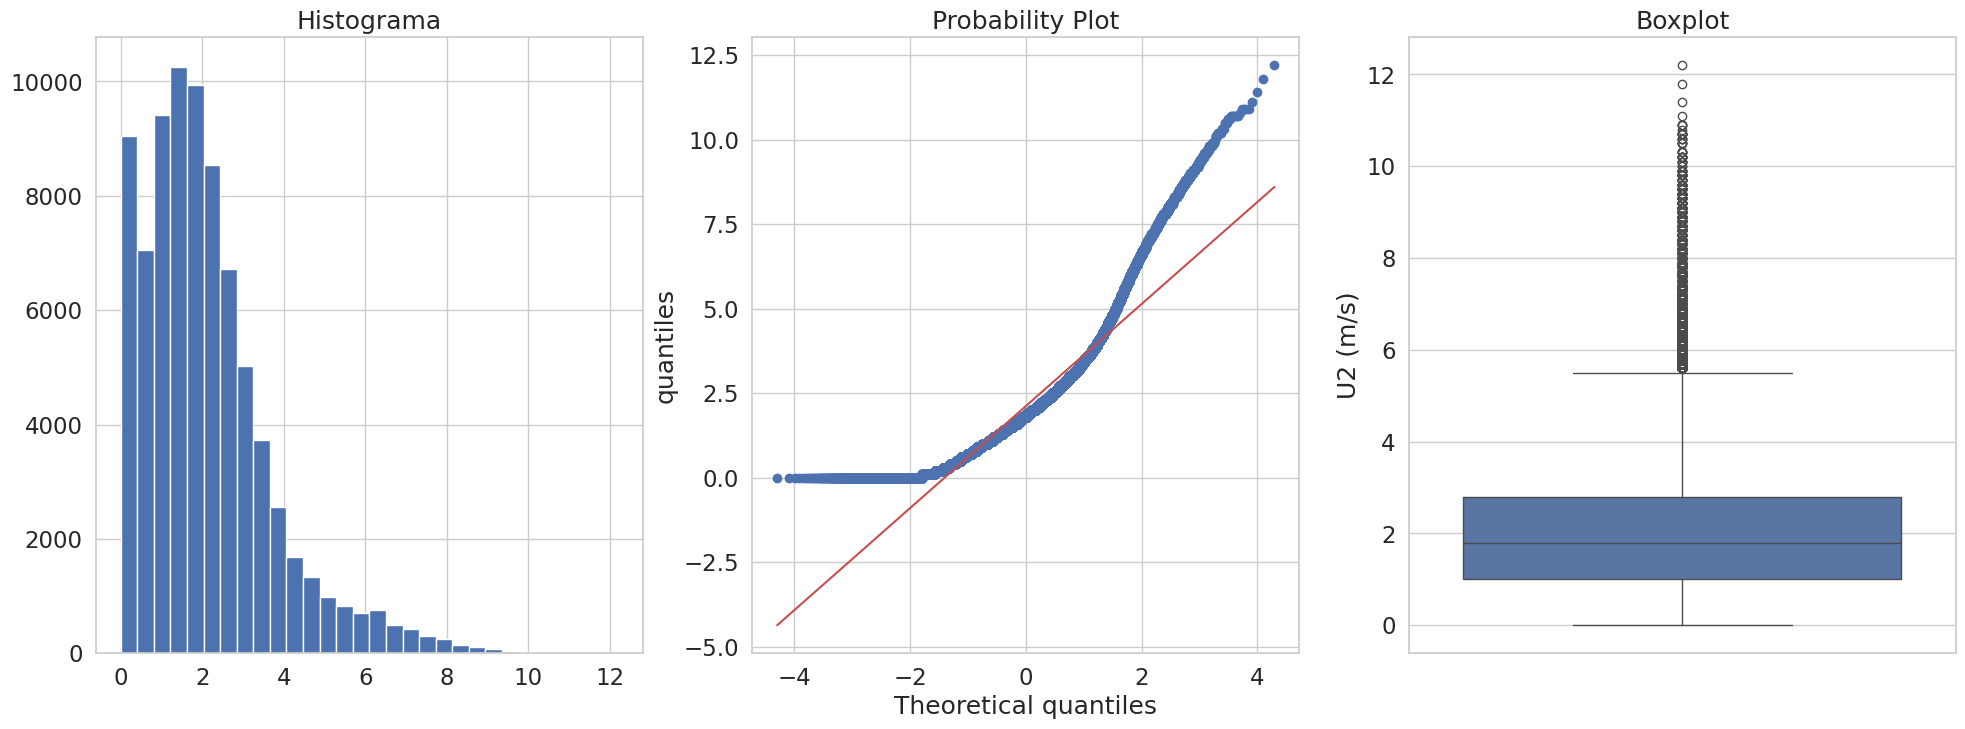

In [74]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['U2 (m/s)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['U2 (m/s)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['U2 (m/s)'])
plt.title('Boxplot')
plt.show()

**RESUMO DOS CINCO NÚMEROS:**

Aqui foi utilizado a fórmula ".quantile()" para calcular o resumo dos cinco números.

In [109]:
# Calcular os quartis:
Q3 = df["PREC (mm)"].quantile(0.75)
Q1 = df["PREC (mm)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [110]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 0.0 Q3 =  0.0 IQR = 0.0 LimSup = 0.0 LimInf = 0.0


In [111]:
# Calcular os quartis:
Q3 = df["P ATM (mB)"].quantile(0.75)
Q1 = df["P ATM (mB)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [112]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 977.1 Q3 =  980.6 IQR = 3.5 LimSup = 985.85 LimInf = 971.85


In [113]:
# Calcular os quartis:
Q3 = df["QG (Kj/m²)"].quantile(0.75)
Q1 = df["QG (Kj/m²)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [114]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 290.81350000000003 Q3 =  2319.64975 IQR = 2028.83625 LimSup = 5362.904125 LimInf = -2752.440875


In [115]:
# Calcular os quartis:
Q3 = df["T AR (°C)"].quantile(0.75)
Q1 = df["T AR (°C)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [116]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 26.5 Q3 =  32.6 IQR = 6.100000000000001 LimSup = 41.75 LimInf = 17.349999999999998


In [117]:
# Calcular os quartis:
Q3 = df["UR (%)"].quantile(0.75)
Q1 = df["UR (%)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [118]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 36.0 Q3 =  73.0 IQR = 37.0 LimSup = 128.5 LimInf = -19.5


In [119]:
# Calcular os quartis:
Q3 = df["U2 (m/s)"].quantile(0.75)
Q1 = df["U2 (m/s)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [120]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 1.0 Q3 =  2.8 IQR = 1.7999999999999998 LimSup = 5.5 LimInf = -1.6999999999999997


In [121]:
# Coeficiente de assimetria de Pearson:
# As=3(média-mediana)/desvio padrão
# Próximo de zero ela é simétrica

In [122]:
# As=3(média-mediana)/desvio padrão

In [123]:
def Calculadora_Assimetria (Coluna):
  AS=3*(df[Coluna].mean()-df[Coluna].median())/(df[Coluna].std())
  print("Coeficiente de assimetria para:", Coluna, AS)

In [124]:
Calculadora_Assimetria("PREC (mm)")
Calculadora_Assimetria("P ATM (mB)")
Calculadora_Assimetria("QG (Kj/m²)")
Calculadora_Assimetria("T AR (°C)")
Calculadora_Assimetria("UR (%)")
Calculadora_Assimetria("U2 (m/s)")

Coeficiente de assimetria para: PREC (mm) 0.3887381195678971
Coeficiente de assimetria para: P ATM (mB) -0.13171586521477785
Coeficiente de assimetria para: QG (Kj/m²) 0.30383498407144177
Coeficiente de assimetria para: T AR (°C) -0.09878687980340031
Coeficiente de assimetria para: UR (%) -0.24809202048145892
Coeficiente de assimetria para: U2 (m/s) 0.6019685813043232



**Utilizando o z-score:**

*   Método que avalia quantos desvios padrão o valor observado está situado além da média;
*   3 desvios em relação a média é o limite para outlier e pode ser negativo ou positivo;
*   Apenas para dados contendo distribuição simétrica ou gaussiana.



In [126]:
z_scores=(df["PREC (mm)"]-np.mean(df["PREC (mm)"]))/np.std(df["PREC (mm)"])

In [127]:
z_scores2=(df["P ATM (mB)"]-np.mean(df["P ATM (mB)"]))/np.std(df["P ATM (mB)"])

In [128]:
z_scores3=(df["QG (Kj/m²)"]-np.mean(df["QG (Kj/m²)"]))/np.std(df["QG (Kj/m²)"])

In [129]:
z_scores4=(df["T AR (°C)"]-np.mean(df["T AR (°C)"]))/np.std(df["T AR (°C)"])

In [130]:
z_scores5=(df["UR (%)"]-np.mean(df["UR (%)"]))/np.std(df["UR (%)"])

In [131]:
z_scores6=(df["U2 (m/s)"]-np.mean(df["U2 (m/s)"]))/np.std(df["U2 (m/s)"])

Text(0.5, 1.0, 'PREC (mm)')

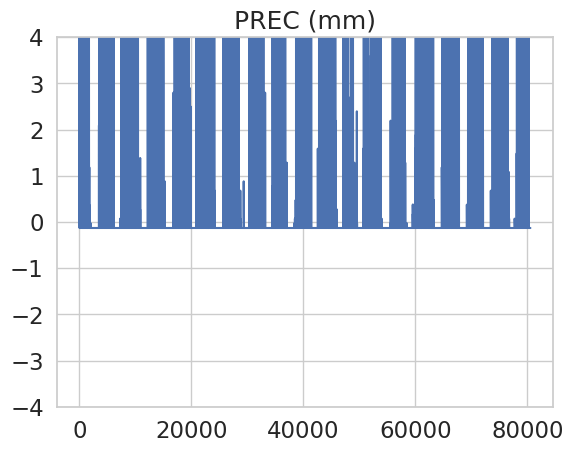

In [148]:
plt.plot(z_scores)
plt.axis(ymin=-4,ymax=4)
plt.title("PREC (mm)")

Text(0.5, 1.0, 'P ATM (mB)')

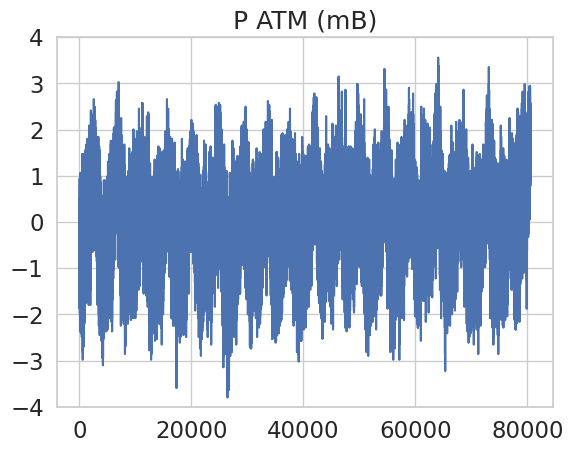

In [133]:
plt.plot(z_scores2)
plt.axis(ymin=-4,ymax=4)
plt.title("P ATM (mB)")

Text(0.5, 1.0, 'QG (Kj/m²)')

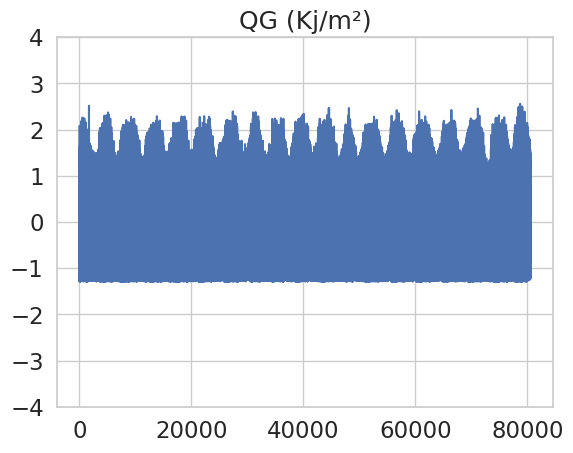

In [134]:
plt.plot(z_scores3)
plt.axis(ymin=-4,ymax=4)
plt.title("QG (Kj/m²)")

Text(0.5, 1.0, 'P ATM (mB)')

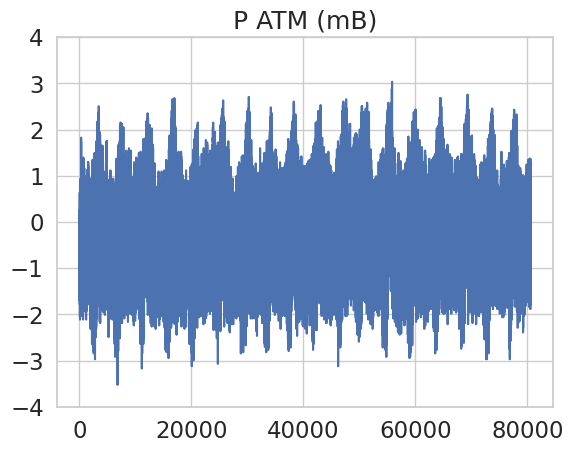

In [135]:
plt.plot(z_scores4)
plt.axis(ymin=-4,ymax=4)
plt.title("P ATM (mB)")

Text(0.5, 1.0, 'UR (%)')

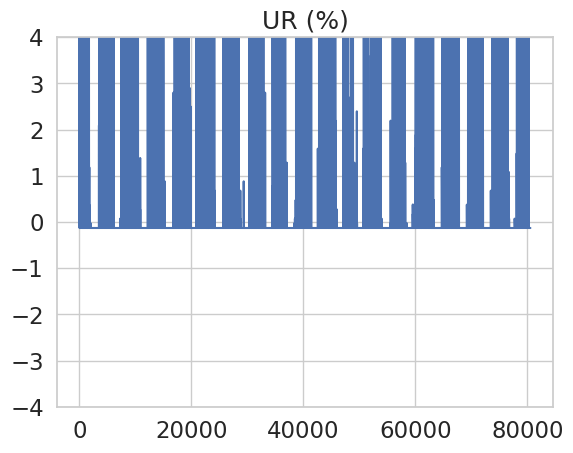

In [136]:
plt.plot(z_scores)
plt.axis(ymin=-4,ymax=4)
plt.title("UR (%)")

Text(0.5, 0, 'horas')

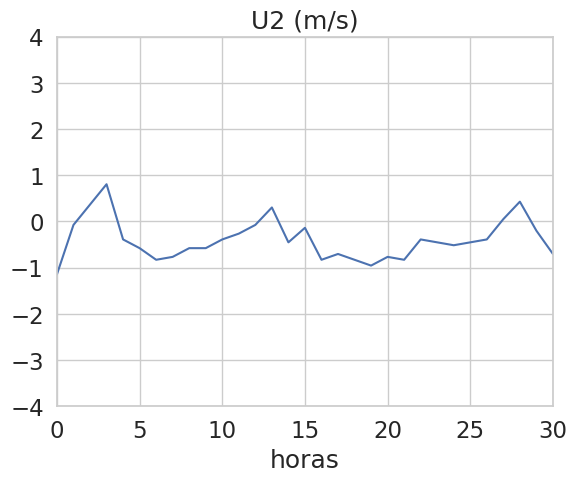

In [137]:
plt.plot(z_scores6)
plt.axis(ymin=-4,ymax=4)
plt.axis(xmin=0,xmax=30)
plt.title("U2 (m/s)")
plt.xlabel("horas")

Agora calculando o z-score de cada variável é possível analisar a quantidade destes valores dentro e fora do limite estabelecido estatisticamente.



In [140]:
def z_score(Coluna):
  LimSup = df[Coluna].mean() + (3*df[Coluna].std()) #Limite superior
  LimInf = df[Coluna].mean() - (3*df[Coluna].std()) #Limite inferior
  # Calcular a quantidade de valores que estão abaixo ou
  # acima do inferior e superior (valores extremos):
  df_aux = df[Coluna]
  LS = df_aux > LimSup
  LI = df_aux < LimInf
  # Contar a quantidade de valores extremos:
  sum_LS = df_aux[LS].count()
  sum_LI = df_aux[LI].count()
  # Calcular o percentual:
  per_sum_LS = (sum_LS*100)/len(df[Coluna])
  per_sum_LI = (sum_LI*100)/len(df[Coluna])
  print("Resumo dos 5 números para", Coluna,":")
  print('LimSup:', round(LimSup,2))
  print('LimInf:', round(LimInf,2))
  print('Quantidade acima de LS:',sum_LS)
  print('Quantidade abaixo de LI:',sum_LI)
  print('LS(%):', round(per_sum_LS,2))
  print('LI(%):', round(per_sum_LI,2))
  print("")


In [141]:
z_score("PREC (mm)")

Resumo dos 5 números para PREC (mm) :
LimSup: 6.2
LimInf: -5.68
Quantidade acima de LS: 977
Quantidade abaixo de LI: 0
LS(%): 1.21
LI(%): 0.0



In [142]:
z_score("T AR (°C)")

Resumo dos 5 números para T AR (°C) :
LimSup: 41.45
LimInf: 17.68
Quantidade acima de LS: 1
Quantidade abaixo de LI: 6
LS(%): 0.0
LI(%): 0.01



In [145]:
z_score("QG (Kj/m²)")

Resumo dos 5 números para QG (Kj/m²) :
LimSup: 4534.23
LimInf: -1816.89
Quantidade acima de LS: 0
Quantidade abaixo de LI: 0
LS(%): 0.0
LI(%): 0.0



In [146]:
z_score("UR (%)")

Resumo dos 5 números para UR (%) :
LimSup: 119.73
LimInf: -9.29
Quantidade acima de LS: 0
Quantidade abaixo de LI: 0
LS(%): 0.0
LI(%): 0.0



In [147]:
z_score("U2 (m/s)")

Resumo dos 5 números para U2 (m/s) :
LimSup: 6.89
LimInf: -2.65
Quantidade acima de LS: 1546
Quantidade abaixo de LI: 0
LS(%): 1.92
LI(%): 0.0

